In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

训练任务：  
生成sin函数样本数据，对函数值进行顺序抽样，每50个数据点作为一组，前49个作为x_data，第50个数据点作为y_label。  
模型输入/输出:依次输入每组数据的前49个，尝试预测出第50个数据（包括x坐标和y坐标)  
每一个数据的shape: (2, )

1000


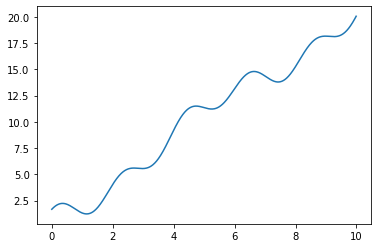

In [3]:
# 在函数曲线上进行采样
x = np.arange(0, 10, 0.01)
print(len(x))
#y = np.sin(x)
y = np.sin(3*x + 0.85) - np.cos(x-2) + 0.5 + 2 * x
plt.plot(x, y)

In [4]:
print(x[:5])
print(y[:5])

[0.   0.01 0.02 0.03 0.04]
[1.66742724 1.69777209 1.72738261 1.75624285 1.78433748]


In [5]:
data_all = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
print(data_all[:5])

[[0.         1.66742724]
 [0.01       1.69777209]
 [0.02       1.72738261]
 [0.03       1.75624285]
 [0.04       1.78433748]]


In [6]:
# 对采样后的数据进行分组
sample_len = 50
train_data = []
label_data = []
for index in range(len(data_all) - sample_len + 1):
    train_data.append(data_all[index: index+sample_len-1])
    label_data.append(data_all[index+sample_len-1])

train_data = np.array(train_data)
label_data = np.array(label_data)

print('train data shape: ', train_data.shape)
print('label data shape: ', label_data.shape)

train data shape:  (951, 49, 2)
label data shape:  (951, 2)


In [7]:
# 创建rnn网络
model = keras.models.Sequential([
    keras.layers.SimpleRNN(units=128, input_shape=(49, 2), return_sequences=False),
    keras.layers.Dense(2)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16768     
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 17,026
Trainable params: 17,026
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics=['accuracy'])

In [9]:
batch_size = 8
history = model.fit(train_data, label_data,
                    epochs = 10,
                    batch_size = batch_size)

Train on 951 samples
Epoch 1/10
951/951 [==============================] - 5s 6ms/sample - loss: 14.8434 - accuracy: 0.9211 3s - loss
Epoch 2/10
951/951 [==============================] - 4s 4ms/sample - loss: 0.6287 - accuracy: 1.0000
Epoch 3/10
951/951 [==============================] - 4s 4ms/sample - loss: 0.1395 - accuracy: 1.00000s - loss: 0.1398 - accuracy: 1.00
Epoch 4/10
951/951 [==============================] - 4s 4ms/sample - loss: 0.0643 - accuracy: 1.0000
Epoch 5/10
951/951 [==============================] - 4s 4ms/sample - loss: 0.0358 - accuracy: 1.0000
Epoch 6/10
951/951 [==============================] - 4s 4ms/sample - loss: 0.0178 - accuracy: 1.0000
Epoch 7/10
951/951 [==============================] - 4s 4ms/sample - loss: 0.0119 - accuracy: 0.9979
Epoch 8/10
951/951 [==============================] - 4s 4ms/sample - loss: 0.0086 - accuracy: 1.0000
Epoch 9/10
951/951 [==============================] - 4s 4ms/sample - loss: 0.0068 - accuracy: 1.0000
Epoch 10/10
951/

In [10]:
pred = model.predict(train_data)

In [11]:
print(len(pred))
print(pred[:5])

951
[[0.55593836 2.2017334 ]
 [0.5647118  2.1921294 ]
 [0.57346576 2.1817691 ]
 [0.5822018  2.1706724 ]
 [0.5909227  2.1588583 ]]


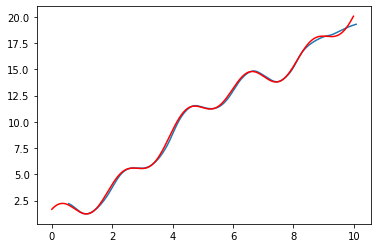

In [12]:
plt.plot(pred[:,0], pred[:,1])
plt.plot(x, y, color='r')